In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# !ls

In [3]:
dev_label = pd.read_csv("/kaggle/input/cuuvoiiiiiiii/devset_images_gt.csv")
dev_label

,id,label
0,3519864665,0
1,4896119055,0
2,3468473862,0
3,4120853942,0
4,4436083254,0
...,...,...
5275,8119782888,0
5276,6093294301,1
5277,6791185487,0
5278,9144682941,0


In [4]:
dev_label.shape


(5280, 2)

In [5]:
test_csv = pd.read_csv('/kaggle/input/cuuvoiiiiiiii/test.csv')
test_csv

,image_id,title,description,user_tags
0,3483809003,"Flooded Parking Lot At Emily Fowler Library, A...",Denton Creek overflows its banks and floods Oa...,"project, slis 5715, spring 2009"
1,3712805295,L'arc de Barà / The roman arch of Barà,Sembla que fou dedicat a August entorn l'any 1...,"arc, arc_de_berà, arch, archaeology, arco, arq..."
2,379845620,Highest point over the sea level that is reach...,NaN,NaN
3,7343264988,Lagos after the rains,"After heavy rain, Lagos (Nigeria) was still fl...","africa, lagos, nigeria"
4,3843337492,flooded Corley Ave,also a local black out due to the tree branch ...,"flood, storm, toronto"
...,...,...,...,...
1315,6452132743,Landscapes and cityscapes: daily dose of ugliness,You can find more like this in my Landscapes a...,"bouw, bus station, commuting, construction, da..."
1316,244899140,A cool looking building the the Parque Central,NaN,"guatemala, xela"
1317,3073018258,Just Plain Wet,I liked the reflection of the trees on the wet...,"driving, fall, me, november, photographing, ra..."
1318,49525361,... Palmer,Looking up toward Magnolia. Our neighbor's hou...,"hurricane katrina, new orleans, post katrina"


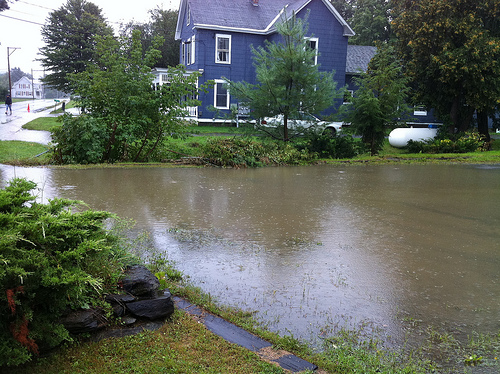

Image: 6099582129.jpg
  Shape (dimensions): 500x374
  Size (bytes): 168632 bytes


In [6]:
import os
from IPython.display import display, Image
from PIL import Image as PILImage

folder_path = "/kaggle/input/cuuvoiiiiiiii/devset_images/devset_images"
displayed_images = 0  # Track the number of displayed images

for filename in os.listdir(folder_path):
    # Check if the filename starts with '._' or if it's not an image file
    if filename.startswith('._') or not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')):
        continue  # Skip this file
    
    # Display the image using IPython.display
    image_path = os.path.join(folder_path, filename)
    display(Image(filename=image_path))
    displayed_images += 1

    # Open the image using Pillow to get its dimensions and size
    with PILImage.open(image_path) as img:
        width, height = img.size
        size_bytes = os.path.getsize(image_path)
        print(f"Image: {filename}")
        print(f"  Shape (dimensions): {width}x{height}")
        print(f"  Size (bytes): {size_bytes} bytes")
    
    # Check if we have displayed 5 images
    if displayed_images >= 1:
        break  


In [7]:
folder_path = "/kaggle/input/cuuvoiiiiiiii/devset_images/devset_images"
image_count = 0  # Initialize the image count to 0

for filename in os.listdir(folder_path):
    # Check if the filename starts with '._' or if it's not an image file
    if filename.startswith('._') or not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')):
        continue  # Skip this file
    
    image_count += 1

print(f"Total number of images in the folder: {image_count}")


Total number of images in the folder: 5280


In [8]:
from PIL import Image
import os
import re

def process_image(filename, folder_path, target_size=(260, 260)):
    try:
        img = Image.open(os.path.join(folder_path, filename)).resize(target_size)
        return filename.split('.')[0], np.array(img)
    except Exception as e:
        print(f"Error processing image {filename}: {e}")
        return None

# Đường dẫn thư mục
folder_path = '/kaggle/input/cuuvoiiiiiiii/devset_images/devset_images'

# Regex để phù hợp với tên ID
pattern = r'^(?!_\.)\w+\.\w+$'

# Xử lý ảnh và tạo tuples
image_data = [process_image(filename, folder_path) for filename in os.listdir(folder_path) if re.match(pattern, filename)]

# Loại bỏ giá trị None (ảnh không thể xử lý)
image_data = [data for data in image_data if data is not None]

# Tạo DataFrame từ list tuples
df = pd.DataFrame(image_data, columns=['id', 'image_array'])

# Đọc nhãn từ tệp CSV
csv_path = '/kaggle/input/cuuvoiiiiiiii/devset_images_gt.csv'  # Đường dẫn đến tệp CSV của bạn
label_df = pd.read_csv(csv_path)
label_df['id'] = label_df['id'].astype(int)



In [9]:
df['id'] = df['id'].astype(int)
df = pd.merge(df, label_df, on='id')

# In ra DataFrame
print(df)




              id                                        image_array  label
0     6099582129  [[[93, 92, 125], [83, 82, 111], [107, 107, 123...      1
1     2481944299  [[[55, 40, 24], [39, 36, 17], [29, 23, 13], [4...      1
2     6820987318  [[[58, 91, 125], [57, 91, 126], [56, 90, 127],...      0
3      864584409  [[[152, 165, 151], [142, 156, 141], [149, 157,...      1
4     9349393459  [[[230, 255, 252], [230, 255, 255], [220, 253,...      0
...          ...                                                ...    ...
5275  4142771417  [[[192, 201, 252], [186, 201, 251], [194, 203,...      1
5276  5743388887  [[[124, 184, 229], [105, 175, 230], [96, 179, ...      0
5277  3207715884  [[[252, 252, 252], [253, 253, 253], [253, 253,...      1
5278  6080576417  [[[111, 109, 109], [112, 111, 107], [107, 103,...      0
5279  4656252409  [[[183, 218, 253], [184, 220, 254], [185, 219,...      0

[5280 rows x 3 columns]


In [10]:
folder_test_path = '/kaggle/input/cuuvoiiiiiiii/testset_images/testset_images'

# Use a regular expression to match the ID names
pattern = r'^(?!_\.)\w+\.\w+$'

# Process images and create tuples
image_test_data = [process_image(filename, folder_test_path) for filename in os.listdir(folder_test_path) if re.match(pattern, filename)]

# Filter out None values (images that couldn't be processed)
image_test_data = [data for data in image_test_data if data is not None]

In [11]:
columns = ['id', 'feature']

# Create a DataFrame from the list of tuples
test = pd.DataFrame(image_test_data, columns=columns)



In [12]:
test['id'] = test['id'].astype(int)

In [13]:
test

,id,feature
0,4945787026,"[[[238, 233, 240], [236, 230, 239], [237, 229,..."
1,949397428,"[[[1, 30, 70], [2, 31, 71], [1, 30, 70], [2, 3..."
2,4927867913,"[[[133, 191, 180], [124, 183, 173], [121, 179,..."
3,6933529726,"[[[171, 183, 202], [170, 185, 205], [171, 183,..."
4,5285787627,"[[[153, 167, 172], [156, 171, 176], [157, 171,..."
...,...,...
1315,1801276133,"[[[65, 72, 15], [95, 103, 35], [90, 106, 31], ..."
1316,624050167,"[[[167, 154, 177], [165, 140, 143], [217, 197,..."
1317,2910531219,"[[[161, 195, 228], [160, 194, 229], [157, 193,..."
1318,5126069048,"[[[8, 12, 15], [9, 15, 15], [12, 18, 18], [13,..."


In [14]:
import gc
gc.collect()

0

**model**



In [15]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Lambda
from tensorflow.keras import regularizers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=20)

# # # Define image size based on MobileNet input size
# img_size = (260,260)

In [18]:
X_train = df['image_array']
X_train

0       [[[93, 92, 125], [83, 82, 111], [107, 107, 123...
1       [[[55, 40, 24], [39, 36, 17], [29, 23, 13], [4...
2       [[[58, 91, 125], [57, 91, 126], [56, 90, 127],...
3       [[[152, 165, 151], [142, 156, 141], [149, 157,...
4       [[[230, 255, 252], [230, 255, 255], [220, 253,...
                              ...                        
5275    [[[192, 201, 252], [186, 201, 251], [194, 203,...
5276    [[[124, 184, 229], [105, 175, 230], [96, 179, ...
5277    [[[252, 252, 252], [253, 253, 253], [253, 253,...
5278    [[[111, 109, 109], [112, 111, 107], [107, 103,...
5279    [[[183, 218, 253], [184, 220, 254], [185, 219,...
Name: image_array, Length: 5280, dtype: object

In [20]:
y_train = df['label']
y_train

0       1
1       1
2       0
3       1
4       0
       ..
5275    1
5276    0
5277    1
5278    0
5279    0
Name: label, Length: 5280, dtype: int64

In [24]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(260, 260, 3), drop_connect_rate=0.5)

# Set the base model to be trainable
base_model.trainable = True

# Create a Sequential model
model = Sequential()

# Add the EfficientNetB4 base model to the Sequential model
model.add(base_model)
model.add(keras.layers.Dense(32, activation='relu'))
# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add a Dropout layer
model.add(Dropout(0.5))



# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(GlobalAveragePooling2D())
# model.add(keras.layers.Dropout(0.4))
# Add a Dense output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.012)))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 9, 9, 1792)        17673823  
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 9, 9, 32)          57376     
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17731232 (67.64 MB)
Trainable params: 17

In [25]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(5e-4, decay_steps=10000, decay_rate=0.9)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping( monitor='val_accuracy',patience=5,restore_best_weights=True)

In [26]:
X_train_list = list(X_train)

# Concatenate the list into a 3D array
X_train_3d = np.stack(X_train_list)

# Convert Y to a 1D NumPy array
Y_array = y_train.values

# Convert to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_3d)
Y_tensor = tf.convert_to_tensor(Y_array)

In [27]:
history = model.fit(X_train_tensor, Y_tensor, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


2023-11-12 10:47:00.330621: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


132/132 [==============================] - 186s 761ms/step - loss: 0.3700 - accuracy: 0.8464 - val_loss: 0.2835 - val_accuracy: 0.9015
Epoch 2/50
132/132 [==============================] - 96s 727ms/step - loss: 0.2078 - accuracy: 0.9328 - val_loss: 0.2869 - val_accuracy: 0.9129
Epoch 3/50
132/132 [==============================] - 96s 728ms/step - loss: 0.1500 - accuracy: 0.9550 - val_loss: 0.5323 - val_accuracy: 0.9006
Epoch 4/50
132/132 [==============================] - 96s 729ms/step - loss: 0.1372 - accuracy: 0.9621 - val_loss: 0.2626 - val_accuracy: 0.9176
Epoch 5/50
132/132 [==============================] - 96s 728ms/step - loss: 0.0976 - accuracy: 0.9725 - val_loss: 0.3373 - val_accuracy: 0.9167
Epoch 6/50
132/132 [==============================] - 96s 724ms/step - loss: 0.0883 - accuracy: 0.9777 - val_loss: 0.3587 - val_accuracy: 0.9157
Epoch 7/50
132/132 [==============================] - 95s 723ms/step - loss: 0.0728 - accuracy: 0.9799 - val_loss: 0.4157 - val_accuracy: 0.

In [30]:
X_test = test['feature']
X_test= list(X_test)
# X_test

In [31]:

X_test = np.stack(X_test)

# Convert to TensorFlow tensors
X_test = tf.convert_to_tensor(X_test)

In [32]:
predictions = model.predict(X_test)

42/42 [==============================] - 9s 138ms/step


In [33]:
threshold = 0.6


# Áp dụng ngưỡng để chuyển đổi dự đoán thành giá trị nhị phân (0 hoặc 1)
binary_predictions = (np.array(predictions) > threshold).astype(int)

# Tạo DataFrame từ mảng dự đoán nhị phân và tên ảnh
# pred = pd.DataFrame(binary_predictions, columns=[f"label{i}" for i in range(1, binary_predictions.shape[1] + 1)])
pred = pd.DataFrame(binary_predictions, columns=["label"] * binary_predictions.shape[1])
pred["id"] = test["id"]




In [34]:
pred = pred[['id', 'label']]

In [35]:
csv_file_path = "/kaggle/working/predictions1.csv"
pred.to_csv(csv_file_path, index=False)

In [ ]:
pre = pd.read_csv('/kaggle/working/predictions1.csv')

In [ ]:
pre